# 🏠 House Price Prediction using Linear Regression


In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 



# 🔃 Loading dataset

In [57]:
df = pd.read_csv(r"house_price_regression_dataset.csv")


# Analysing dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [59]:
df_clean = df.drop(columns = ["Year_Built"],axis = 1)

In [60]:
df_clean['Log_House_Price'] = np.log(df_clean['House_Price'])


In [61]:
df_clean.drop(["House_Price"],axis = 1,inplace = True)


In [62]:
df_clean.duplicated().sum()

0

# EDA Process

In [63]:
print(df['Neighborhood_Quality'].unique())
print(df['Neighborhood_Quality'].dtype)


[ 5  6  9  8  1  2  4 10  7  3]
int64


In [64]:
df_clean.describe()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,Log_House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2815.422000,2.990000,1.973000,2.778087,1.022000,5.615000,13.230421
std,1255.514921,1.427564,0.820332,1.297903,0.814973,2.887059,0.491927
min,503.000000,1.000000,1.000000,0.506058,0.000000,1.000000,11.622917
25%,1749.500000,2.000000,1.000000,1.665946,0.000000,3.000000,12.903331
50%,2862.500000,3.000000,2.000000,2.809740,1.000000,6.000000,13.350721
75%,3849.500000,4.000000,3.000000,3.923317,2.000000,8.000000,13.625731
max,4999.000000,5.000000,3.000000,4.989303,2.000000,10.000000,13.918281


In [65]:
print(df_clean.columns)


Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Lot_Size',
       'Garage_Size', 'Neighborhood_Quality', 'Log_House_Price'],
      dtype='object')


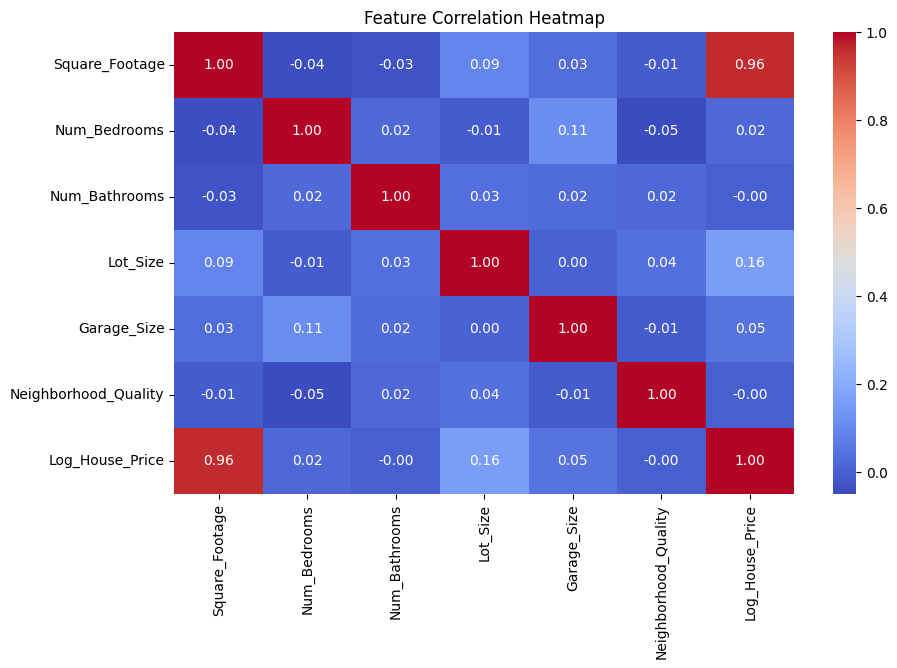

In [66]:
correlation_data = df_clean[[
    'Square_Footage',
    'Num_Bedrooms',
    'Num_Bathrooms',
    'Lot_Size',
    'Garage_Size',
    'Neighborhood_Quality',
    'Log_House_Price'  
]]


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()



# Splitting the dataset

In [67]:
X = df_clean.drop(columns=["Num_Bedrooms", "Num_Bathrooms", "Neighborhood_Quality", "Log_House_Price"])
y = df_clean["Log_House_Price"]


In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [69]:
scale = StandardScaler()
X_train_scaler = scale.fit_transform(X_train)
X_test_scaler = scale.fit_transform(X_test)

# Model fitting

In [77]:
model = LinearRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)


# Evaluation in test data

In [71]:
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,prediction)
print("mean absolute error:",mae)
print("mean squared error:",mse)
print("root mean squared error:",rmse)
print("R2score:",r2)

mean absolute error: 0.09655798292840466
mean squared error: 0.015533624074742864
root mean squared error: 0.12463396035889601
R2score: 0.9353916360806608


# Evaluation in train data

In [76]:
train_prediction = model.predict(X_train)

train_mae = mean_absolute_error(y_train, train_prediction)
train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
train_r2score = r2_score(y_train, train_prediction)

print("Train MAE:", train_mae)
print("Train RMSE:", train_rmse)
print("Train R2 Score:", train_r2score)


Train MAE: 0.10155354712064288
Train RMSE: 0.1326676886353126
Train R2 Score: 0.9272937573860872


# Plotting graph for actual and predicted values

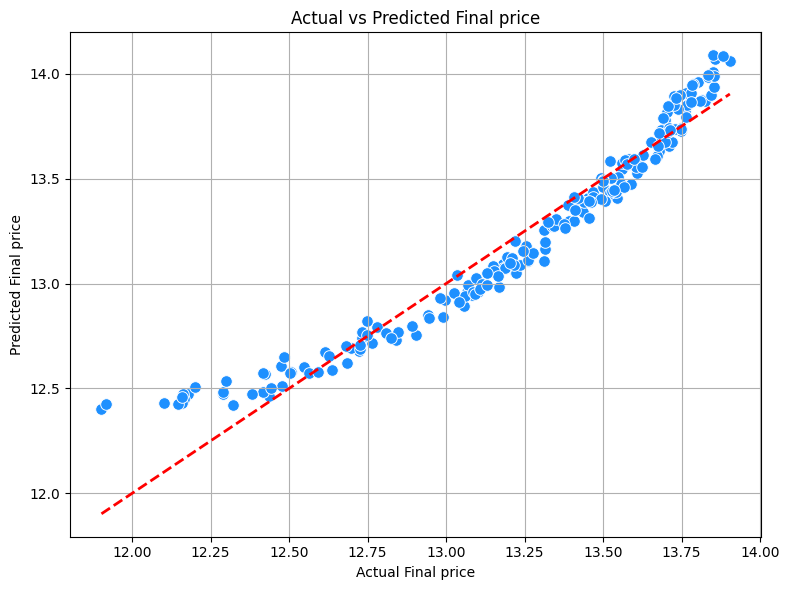

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Set the plot size
plt.figure(figsize=(8, 6))

# Step 2: Plot actual vs predicted
sns.scatterplot(x=y_test, y=prediction, color='dodgerblue', s=70)

# Step 3: Plot a perfect prediction line (diagonal)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Step 4: Add labels and title
plt.xlabel("Actual Final price")
plt.ylabel("Predicted Final price")
plt.title("Actual vs Predicted Final price")

plt.grid(True)
plt.tight_layout()
plt.show()

